# Lead Score Case Study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset
df= pd.read_csv('Leads.csv')

In [3]:
# finding unique values in each feature
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [4]:
# function to replace Select values with nan from the respective features
def b_map(x):
    return x.replace({'Select' : np.nan})

In [5]:
#replacing select with nan 
vars=['Lead Profile','City','Specialization','How did you hear about X Education']
df[vars]=df[vars].apply(b_map)

In [6]:
# checking the percentage of nulls
(df.isnull().sum()/len(df))*100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# Checking the unique records
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Droping the features having more than 40% of nulls and single values
df.drop(columns= ['Prospect ID','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education','Update me on Supply Chain Content',
        'Receive More Updates About Our Courses','Magazine','Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True)

In [9]:
# converting binary categorical features to numerical
varlist=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [10]:
len(df.columns)

24

In [11]:
df.head(10)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified
5,660680,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified
7,660664,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,0,0,0,0,0,0,NaN,Thane & Outskirts,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,4.0,Email Opened,India,Finance Management,NaN,NaN,0,0,0,0,0,0,NaN,Mumbai,0,Email Opened


In [12]:
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


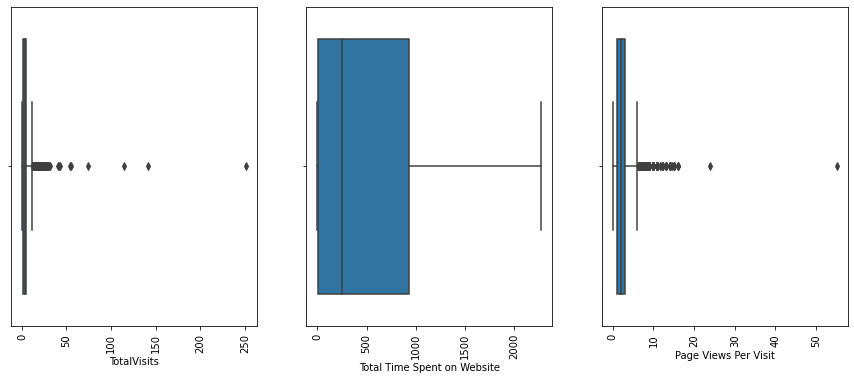

In [13]:
#understanding the distribution of numerical cols using boxplot
plt.figure(figsize = (15,20))
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.boxplot(df[i[1]],hue=df.Converted)

In [14]:
# filling the null values with median as there are outliers identified in the features
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)


In [15]:
df['Lead Source'].value_counts(dropna=False,normalize=True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
testone               0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
youtubechannel        0.010823
Pay per Click Ads     0.010823
blog                  0.010823
Name: Lead Source, dtype: float64

In [16]:
# imputing nulls in Lead Scource feature with mode function
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)
# Created new value - other, replacing the values with less than 1% weightage
df['Lead Source'].replace({'google':'Google','Referral Sites':'Reference'},inplace=True)
df['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','NC_EDM','welearnblog_Home','WeLearn','testone','youtubechannel','blog','Social Media'
,'Pay per Click Ads','Live Chat'] ,'Other Source',inplace=True)

In [17]:
(df.isnull().sum()/len(df))*100 

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [18]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
# droping highly skewed columns 
df.drop(columns=['Do Not Email', 'Do Not Call','Search','Last Activity',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course','Country','Tags','City'],inplace=True)

In [20]:
# droping the rows having nulls for Specilization and Occupation features.
df=df[~(df['Specialization'].isna() &  df['What is your current occupation'].isna() )]

In [21]:
(df.isnull().sum()/len(df))*100 

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Specialization                            24.939157
What is your current occupation           16.100935
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [22]:
df.shape

(7807, 11)

In [23]:
# droping the null rows for Specialization column 
# a. unnecessaryly skewness increased
# b. imputaion of occupation is meaningful using Specialization than the viceversa 
#df=df[~(df['Specialization'].isna())]
df.Specialization.fillna('NA',inplace=True)
df['What is your current occupation'].fillna('NA',inplace=True)

In [24]:
df.shape

(7807, 11)

In [25]:
(df.isnull().sum()/len(df))*100 

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [26]:
# imputing the Occupation using [Specialization, Occupation ] combined mode
#for j in list(df['Specialization'].value_counts().index):
    
        #df[ (df['Specialization']==i) & (df['What is your current occupation']==j) ]['City'].fillna(df[ (df['Specialization']==i) & (df['What is your current occupation']==j) ]['City'].mode()[0],inplace=True)
 #   df['What is your current occupation'][ (df['Specialization']==j) & (df['What is your current occupation'].isna())] = df[ (df['Specialization']==j) ]['What is your current occupation'].mode()[0]     #.fillna(,inplace=True)
        

In [27]:
(df.isnull().sum()/len(df))*100 

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [28]:
df.shape

(7807, 11)

In [29]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,NA,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,NA,Unemployed,0,Modified


In [30]:
# understanding the distribution of numerical features.
df.describe(percentiles=[.80,.95,.96,.97,.98,.99,.991,.995,.997,.998])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000
mean,616957.163187,0.436659,3.771359,538.148713,2.601488,0.369668
std,23353.594140,0.496004,5.008587,557.151297,2.136753,0.482746
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,614878.000000,0.000000,3.000000,298.000000,2.000000,0.000000
80%,641402.400000,1.000000,5.000000,1143.000000,4.000000,1.000000
95%,655220.100000,1.000000,10.000000,1587.700000,6.000000,1.000000
96%,656381.760000,1.000000,11.000000,1633.000000,7.000000,1.000000
97%,657618.380000,1.000000,12.000000,1680.820000,7.000000,1.000000
98%,658672.720000,1.000000,14.000000,1759.000000,8.000000,1.000000


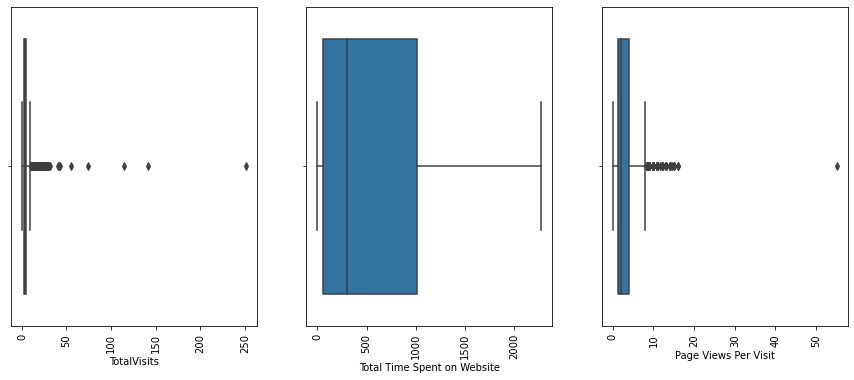

In [31]:
plt.figure(figsize = (15,20))
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.boxplot(df[i[1]],hue=df.Converted)

In [32]:
# capping the numerical columns by 99% percentile
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in var:
    
    cap = df[i].quantile(.99)
    
    df[i][df[i] > cap]= cap 

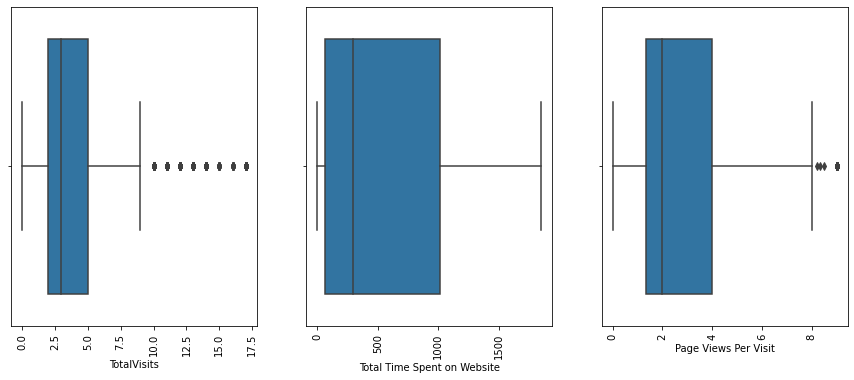

In [33]:
plt.figure(figsize = (15,20))

for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.boxplot(df[i[1]],hue=df.Converted)

In [34]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000
mean,616957.163187,0.436659,3.648264,536.911300,2.570961,0.369668
std,23353.594140,0.496004,3.229939,553.989412,1.951112,0.482746
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596452.000000,0.000000,2.000000,61.000000,1.330000,0.000000
50%,614878.000000,0.000000,3.000000,298.000000,2.000000,0.000000
75%,637370.000000,1.000000,5.000000,1017.000000,4.000000,1.000000
max,660737.000000,1.000000,17.000000,1848.880000,9.000000,1.000000


In [35]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,0.0,NA,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674.0,2.5,NA,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428.0,1.0,NA,Unemployed,0,Modified


In [36]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
var=['Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','Last Notable Activity','A free copy of Mastering The Interview']

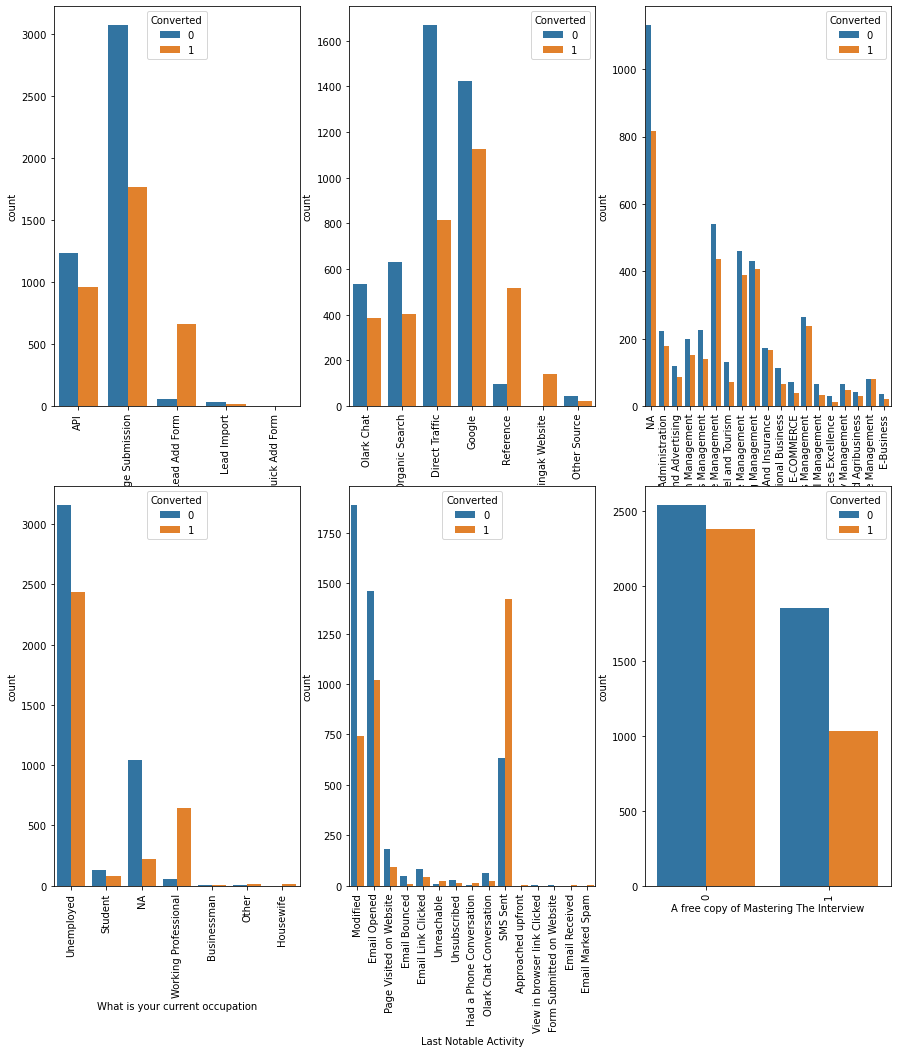

In [38]:
#understaing the distribution of Categorical columns vs Target variable
plt.figure(figsize = (15,25))

for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.countplot(df[i[1]],hue=df.Converted)

    

- Observation : Conversion rate for origin : Lead Add form ; Source : Welingak Website, Clark chat, Google;  Occupation : Working profissional,Unemployed and SMS Sent has comparatively high and higher. 

In [39]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        33.700525
Email Opened                    31.830409
SMS Sent                        26.322531
Page Visited on Website          3.496862
Email Link Clicked               1.652363
Olark Chat Conversation          1.127194
Email Bounced                    0.730114
Unsubscribed                     0.512361
Unreachable                      0.371462
Had a Phone Conversation         0.179326
Email Marked Spam                0.025618
Form Submitted on Website        0.012809
View in browser link Clicked     0.012809
Approached upfront               0.012809
Email Received                   0.012809
Name: Last Notable Activity, dtype: float64

In [40]:
# creating other activity value having less than 1% weightage 
other_act = list(df['Last Notable Activity'].value_counts(normalize=True)[df['Last Notable Activity'].value_counts(normalize=True)*100 <1].index)
other_act

['Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Form Submitted on Website',
 'View in browser link Clicked',
 'Approached upfront',
 'Email Received']

In [41]:
df['Last Notable Activity'].replace(other_act,'Other Activity',inplace=True)

In [42]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   33.700525
Email Opened               31.830409
SMS Sent                   26.322531
Page Visited on Website     3.496862
Other Activity              1.870117
Email Link Clicked          1.652363
Olark Chat Conversation     1.127194
Name: Last Notable Activity, dtype: float64

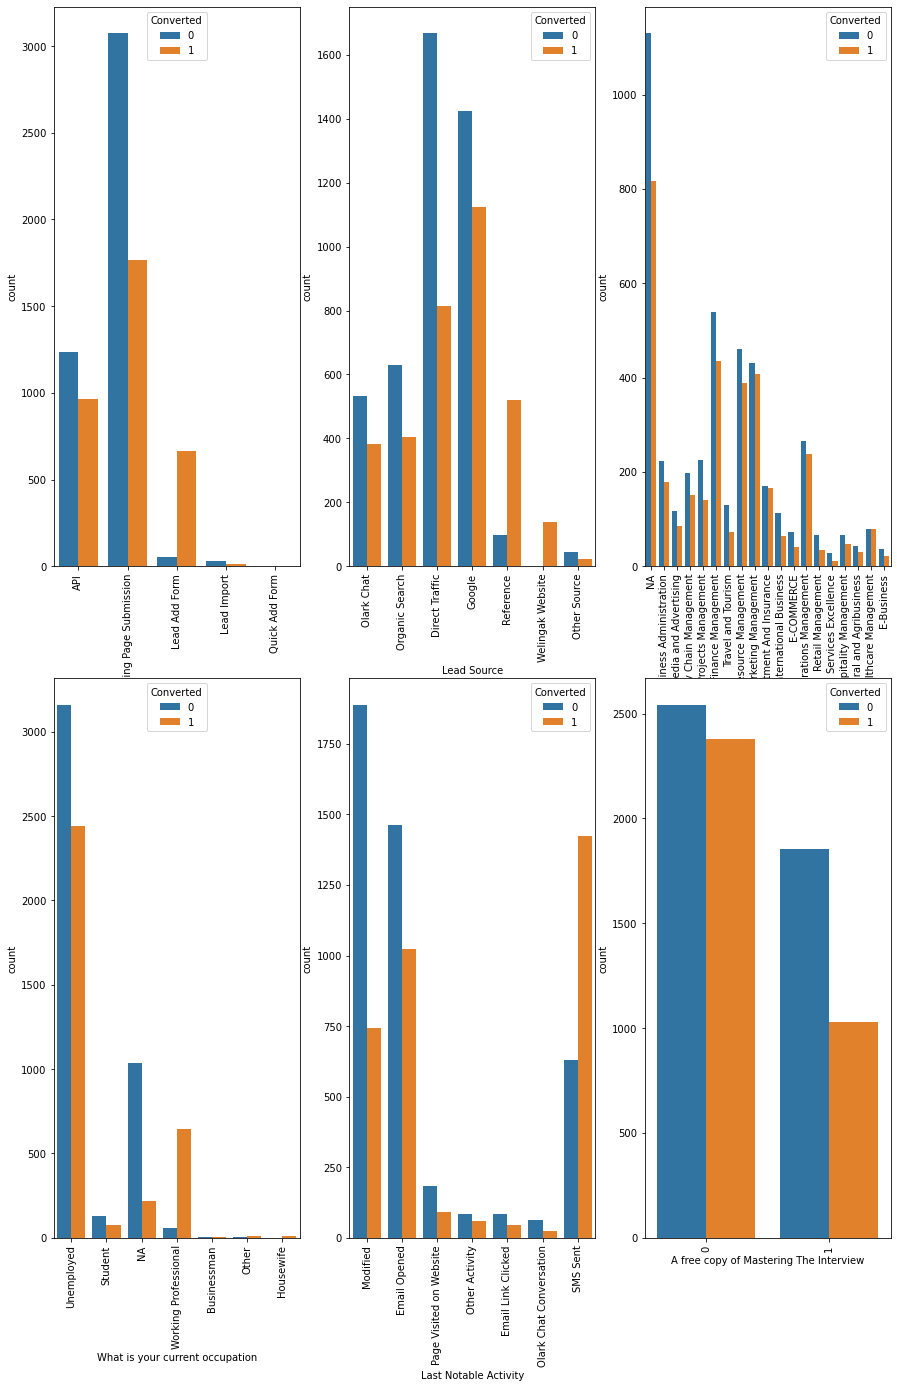

In [43]:
plt.figure(figsize = (15,35))

for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.countplot(df[i[1]],hue=df.Converted)

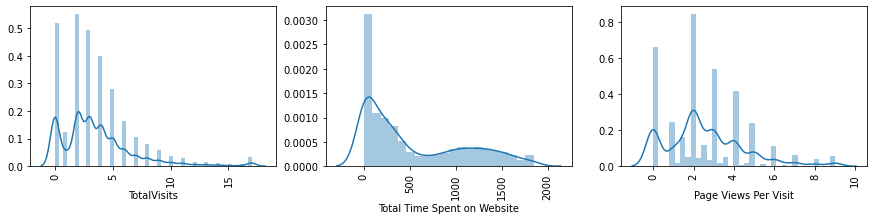

In [44]:
# distribution of numerical columns 
plt.figure(figsize = (15,10))

for i in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,i[0]+1)
    plt.xticks(rotation=90)
    sns.distplot(df[i[1]])

In [45]:
var=['Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','Last Notable Activity']

In [46]:
# creating dummies fro the categorical features
for i in var:
    m1=pd.get_dummies(df[i],drop_first=True,prefix=i.split(' ')[-1])
    df=pd.concat([df,m1],axis=1)

In [47]:
#droping the categorical columns
df.drop(var,1,inplace=True)
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Other Source,Source_Reference,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_NA,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Activity_Email Opened,Activity_Modified,Activity_Olark Chat Conversation,Activity_Other Activity,Activity_Page Visited on Website,Activity_SMS Sent
0,660737,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,660728,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,1,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,660681,1,2.0,1428.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [48]:
# droping the other category columns as they will not add any precise suggesition 
df.drop(columns=['Source_Other Source','Activity_Other Activity','Specialization_NA','occupation_NA'],inplace=True)

### Train Test Split

In [49]:
#Imbalance Ratio
df.Converted.value_counts(normalize=True)*100

0    56.334059
1    43.665941
Name: Converted, dtype: float64

In [50]:
#Spliting Independent - X and Dependent variables -y
X=df.drop(columns=['Converted','Lead Number'])
y=df[['Converted']]

In [51]:
#y.set_index('Lead Number',drop=True,inplace=True)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Scalling

In [54]:
# MinMaxScaler is used because the numerical features did not show any uniform/ normal distribution
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [55]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Activity_Email Opened,Activity_Modified,Activity_Olark Chat Conversation,Activity_Page Visited on Website,Activity_SMS Sent
5001,7.0,358.0,7.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1114,6.0,240.0,6.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3028,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5546,3.0,338.0,3.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8044,1.0,790.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [56]:
# scalling
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[var]=scaler.fit_transform(X_train[var])

In [57]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Activity_Email Opened,Activity_Modified,Activity_Olark Chat Conversation,Activity_Page Visited on Website,Activity_SMS Sent
5001,0.411765,0.193631,0.777778,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1114,0.352941,0.129808,0.666667,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3028,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5546,0.176471,0.182813,0.333333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8044,0.058824,0.427286,0.111111,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Modeling

In [58]:
import statsmodels.api as sm

In [59]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5424
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2436.3
Date:                Mon, 26 Oct 2020   Deviance:                       4872.5
Time:                        20:10:58   Pearson chi2:                 5.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1888      0.261    -12.220      0.000      -3.700      -2.677
TotalVisits                                  1.5861      0.272      5.834      0.000       1.053       2.119
Total Time Spent on Website                  3.5894      0.138     25.928      0.000       3.318       3.861
Page Views Per Visit                        -1.0171      0.263     -3.861      0.000      -1.533      -0.501
A free copy of Mastering The Interview      -0.1970      0.106     -1.858      0.063      -0.405       0.011
Origin_Landing Page Submission              -0.4115      0.129     -3.192      0.001      -0.664      -0.159
Origin_Lead Add Form                         2.6678      0.339      7.868      0.000       2.003       3.332
Origin_Lead Import                           0.6021      0.472      1.274      0.203      -0.324       1.528
Origin_Quick Add Form                     1.214e-10    8.8e-08      0.001      0.999   -1.72e-07    1.73e-07
Source_Google                                0.3565      0.114      3.138      0.002       0.134       0.579
Source_Olark Chat                            1.3928      0.169      8.262      0.000       1.062       1.723
Source_Organic Search                        0.0735      0.131      0.561      0.575      -0.183       0.330
Source_Reference                             0.6295      0.316      1.993      0.046       0.011       1.248
Source_Welingak Website                      3.0760      0.796      3.863      0.000       1.515       4.636
Specialization_Business Administration       0.5259      0.192      2.736      0.006       0.149       0.903
Specialization_E-Business                    0.5697      0.428      1.331      0.183      -0.269       1.408
Specialization_E-COMMERCE                    0.7588      0.322      2.353      0.019       0.127       1.391
Specialization_Finance Management            0.6144      0.145      4.250      0.000       0.331       0.898
Specialization_Healthcare Management         0.5695      0.256      2.220      0.026       0.067       1.072
Specialization_Hospitality Management        0.0245      0.324      0.076      0.940      -0.610       0.659
Specialization_Human Resource Management     0.4272      0.147      2.901      0.004       0.139       0.716
Specialization_IT Projects Management        0.5114      0.203      2.518      0.012       0.113       0.909
Specialization_International Business        0.1852      0.259      0.714      0.475      -0.323       0.693
Specialization_Marketing Management          0.7173      0.146      4.909      0.000       0.431       1.004
Specialization_Media and Advertising         0.4234      0.241      1.754      0.079      -0.050       0.896
Specialization_Operations Manag

## Feature Selection Using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 14),
 ('Origin_Landing Page Submission', False, 3),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Origin_Quick Add Form', False, 21),
 ('Source_Google', True, 1),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 18),
 ('Source_Reference', True, 1),
 ('Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_Finance Management', False, 5),
 ('Specialization_Healthcare Management', False, 6),
 ('Specialization_Hospitality Management', False, 19),
 ('Specialization_Human Resource Management', False, 13),
 ('Specialization_IT Projects Management', False, 10),
 ('Specialization_International Business', False, 17),
 ('Specialization_Marketing Management', True

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
df.shape

(7807, 42)

In [66]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Origin_Landing Page Submission', 'Origin_Quick Add Form',
       'Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Activity_Email Opened'],
      dtype='object')

## Assessing the model with StatsModels

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.1
Date:                Mon, 26 Oct 2020   Deviance:                       4906.2
Time:                        20:11:00   Pearson chi2:                 5.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1559      0.157    -20.083      0.000      -3.464      -2.848
TotalVisits                               1.6078      0.266      6.037      0.000       1.086       2.130
Total Time Spent on Website               3.5999      0.137     26.210      0.000       3.331       3.869
Page Views Per Visit                     -0.9772      0.254     -3.840      0.000      -1.476      -0.478
Origin_Lead Add Form                      2.9131      0.339      8.600      0.000       2.249       3.577
Origin_Lead Import                        0.8426      0.461      1.828      0.068      -0.061       1.746
Source_Google                             0.4738      0.081      5.867      0.000       0.315       0.632
Source_Olark Chat                         1.5806      0.136     11.609      0.000       1.314       1.847
Source_Reference                          0.7169      0.306      2.346      0.019       0.118       1.316
Source_Welingak Website                   2.9622      0.792      3.741      0.000       1.410       4.514
Specialization_Marketing Management       0.3244      0.117      2.770      0.006       0.095       0.554
Specialization_Rural and Agribusiness     0.4920      0.352      1.396      0.163      -0.199       1.183
occupation_Housewife                     23.5358   1.74e+04      0.001      0.999    -3.4e+04    3.41e+04
occupation_Other                          1.8004      0.673      2.676      0.007       0.482       3.119
occupation_Student                        0.9121      0.237      3.852      0.000       0.448       1.376
occupation_Unemployed                     0.9834      0.110      8.927      0.000       0.768       1.199
occupation_Working Professional           3.3644      0.203     16.565      0.000       2.966       3.762
Activity_Modified                        -0.6926      0.088     -7.875      0.000      -0.865      -0.520
Activity_Olark Chat Conversation         -1.1568      0.346     -3.347      0.001      -1.834      -0.479
Activity_Page Visited on Website         -0.7325      0.216     -3.391      0.001      -1.156      -0.309
Activity_SMS Sent                         1.0726      0.089     12.021      0.000       0.898       1.247
=========================================================================================================
"""

### Checking VIFS

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Origin_Lead Add Form,7.29
7,Source_Reference,5.68
2,Page Views Per Visit,5.45
0,TotalVisits,4.65
14,occupation_Unemployed,3.80
8,Source_Welingak Website,2.49
1,Total Time Spent on Website,2.29
19,Activity_SMS Sent,1.74
16,Activity_Modified,1.69
5,Source_Google,1.67


In [70]:
#After dropind one by one of below cols based on p_value and VIF values
col = col.drop('occupation_Housewife', 1)
col=col.drop('Specialization_Rural and Agribusiness') 

col=col.drop('Source_Reference') 

col=col.drop('Origin_Lead Import') 



In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5447
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2465.1
Date:                Mon, 26 Oct 2020   Deviance:                       4930.2
Time:                        20:11:01   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.0728      0.155    -19.885      0.000      -3.376      -2.770
TotalVisits                             1.5940      0.265      6.009      0.000       1.074       2.114
Total Time Spent on Website             3.5864      0.137     26.217      0.000       3.318       3.855
Page Views Per Visit                   -0.9940      0.253     -3.924      0.000      -1.491      -0.497
Origin_Lead Add Form                    3.5603      0.204     17.479      0.000       3.161       3.959
Source_Google                           0.4382      0.080      5.508      0.000       0.282       0.594
Source_Olark Chat                       1.5303      0.135     11.369      0.000       1.267       1.794
Source_Welingak Website                 2.2585      0.740      3.050      0.002       0.807       3.710
Specialization_Marketing Management     0.3012      0.117      2.585      0.010       0.073       0.530
occupation_Other                        1.7527      0.672      2.609      0.009       0.436       3.069
occupation_Student                      0.8765      0.236      3.721      0.000       0.415       1.338
occupation_Unemployed                   0.9573      0.109      8.820      0.000       0.745       1.170
occupation_Working Professional         3.3365      0.202     16.527      0.000       2.941       3.732
Activity_Modified                      -0.6813      0.088     -7.782      0.000      -0.853      -0.510
Activity_Olark Chat Conversation       -1.1534      0.345     -3.341      0.001      -1.830      -0.477
Activity_Page Visited on Website       -0.7276      0.216     -3.375      0.001      -1.150      -0.305
Activity_SMS Sent                       1.0493      0.089     11.816      0.000       0.875       1.223
=======================================================================================================
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.42
0,TotalVisits,4.65
10,occupation_Unemployed,3.72
1,Total Time Spent on Website,2.29
15,Activity_SMS Sent,1.74
3,Origin_Lead Add Form,1.69
12,Activity_Modified,1.68
4,Source_Google,1.63
5,Source_Olark Chat,1.50
11,occupation_Working Professional,1.50


In [73]:
# droping Page Views per Visit as per VIF score
#col=col.drop('Page Views Per Visit')
#col=col.drop('Activity_Page Visited on Website')
col=col.drop('occupation_Other')

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5448
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.8
Date:                Mon, 26 Oct 2020   Deviance:                       4937.6
Time:                        20:11:01   Pearson chi2:                 5.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.0408      0.153    -19.825      0.000      -3.341      -2.740
TotalVisits                             1.6391      0.265      6.188      0.000       1.120       2.158
Total Time Spent on Website             3.5915      0.137     26.270      0.000       3.324       3.859
Page Views Per Visit                   -1.0072      0.253     -3.978      0.000      -1.503      -0.511
Origin_Lead Add Form                    3.5653      0.204     17.507      0.000       3.166       3.964
Source_Google                           0.4340      0.079      5.463      0.000       0.278       0.590
Source_Olark Chat                       1.5391      0.135     11.437      0.000       1.275       1.803
Source_Welingak Website                 2.2615      0.740      3.055      0.002       0.810       3.713
Specialization_Marketing Management     0.3172      0.116      2.732      0.006       0.090       0.545
occupation_Student                      0.8372      0.235      3.564      0.000       0.377       1.298
occupation_Unemployed                   0.9185      0.107      8.586      0.000       0.709       1.128
occupation_Working Professional         3.2984      0.201     16.404      0.000       2.904       3.693
Activity_Modified                      -0.6818      0.087     -7.797      0.000      -0.853      -0.510
Activity_Olark Chat Conversation       -1.1637      0.346     -3.368      0.001      -1.841      -0.486
Activity_Page Visited on Website       -0.7473      0.216     -3.467      0.001      -1.170      -0.325
Activity_SMS Sent                       1.0436      0.089     11.760      0.000       0.870       1.218
=======================================================================================================
"""

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.42
0,TotalVisits,4.63
9,occupation_Unemployed,3.69
1,Total Time Spent on Website,2.28
14,Activity_SMS Sent,1.74
3,Origin_Lead Add Form,1.69
11,Activity_Modified,1.68
4,Source_Google,1.63
5,Source_Olark Chat,1.50
10,occupation_Working Professional,1.50


In [76]:
col=col.drop('Specialization_Marketing Management')

In [77]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5449
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2472.5
Date:                Mon, 26 Oct 2020   Deviance:                       4945.0
Time:                        20:11:01   Pearson chi2:                 5.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.9876      0.152    -19.688      0.000      -3.285      -2.690
TotalVisits                          1.6151      0.264      6.109      0.000       1.097       2.133
Total Time Spent on Website          3.5964      0.137     26.326      0.000       3.329       3.864
Page Views Per Visit                -1.0053      0.253     -3.974      0.000      -1.501      -0.509
Origin_Lead Add Form                 3.5643      0.203     17.521      0.000       3.166       3.963
Source_Google                        0.4387      0.079      5.526      0.000       0.283       0.594
Source_Olark Chat                    1.5187      0.134     11.328      0.000       1.256       1.781
Source_Welingak Website              2.2271      0.740      3.009      0.003       0.776       3.678
occupation_Student                   0.8199      0.235      3.496      0.000       0.360       1.280
occupation_Unemployed                0.9034      0.107      8.461      0.000       0.694       1.113
occupation_Working Professional      3.2847      0.201     16.362      0.000       2.891       3.678
Activity_Modified                   -0.6823      0.087     -7.810      0.000      -0.853      -0.511
Activity_Olark Chat Conversation    -1.1882      0.346     -3.436      0.001      -1.866      -0.510
Activity_Page Visited on Website    -0.7486      0.215     -3.477      0.001      -1.171      -0.327
Activity_SMS Sent                    1.0368      0.089     11.699      0.000       0.863       1.211
====================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.41
0,TotalVisits,4.63
8,occupation_Unemployed,3.69
1,Total Time Spent on Website,2.28
13,Activity_SMS Sent,1.74
3,Origin_Lead Add Form,1.68
10,Activity_Modified,1.68
4,Source_Google,1.62
5,Source_Olark Chat,1.50
9,occupation_Working Professional,1.49


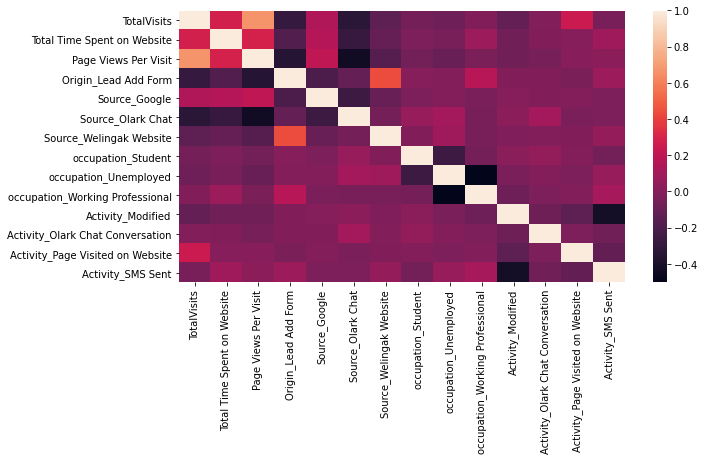

In [79]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(X_train[col].corr())

plt.show()

- Observation : There is multi colinearity between Page Views per visit and Total Visits, so as per VIF droping Page Views per visit

In [80]:
# droping Page Views per Visit as per VIF score
col=col.drop('Page Views Per Visit')
#col=col.drop('Activity_Page Visited on Website')
#col=col.drop('occupation_Other')


In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5450
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.5
Date:                Mon, 26 Oct 2020   Deviance:                       4961.1
Time:                        20:11:02   Pearson chi2:                 5.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.2007      0.143    -22.378      0.000      -3.481      -2.920
TotalVisits                          1.0340      0.219      4.718      0.000       0.604       1.463
Total Time Spent on Website          3.5845      0.136     26.292      0.000       3.317       3.852
Origin_Lead Add Form                 3.7441      0.199     18.812      0.000       3.354       4.134
Source_Google                        0.4346      0.079      5.489      0.000       0.279       0.590
Source_Olark Chat                    1.7053      0.126     13.504      0.000       1.458       1.953
Source_Welingak Website              2.2298      0.740      3.012      0.003       0.779       3.680
occupation_Student                   0.8402      0.235      3.574      0.000       0.379       1.301
occupation_Unemployed                0.9254      0.106      8.692      0.000       0.717       1.134
occupation_Working Professional      3.2959      0.201     16.417      0.000       2.902       3.689
Activity_Modified                   -0.6741      0.087     -7.732      0.000      -0.845      -0.503
Activity_Olark Chat Conversation    -1.1278      0.342     -3.302      0.001      -1.797      -0.458
Activity_Page Visited on Website    -0.5774      0.209     -2.768      0.006      -0.986      -0.169
Activity_SMS Sent                    1.0106      0.088     11.467      0.000       0.838       1.183
====================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,occupation_Unemployed,3.50
0,TotalVisits,2.53
1,Total Time Spent on Website,2.25
12,Activity_SMS Sent,1.70
2,Origin_Lead Add Form,1.64
9,Activity_Modified,1.64
3,Source_Google,1.60
8,occupation_Working Professional,1.47
4,Source_Olark Chat,1.44
5,Source_Welingak Website,1.29


In [83]:


col=col.drop('Activity_Page Visited on Website')



In [84]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5451
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2484.5
Date:                Mon, 26 Oct 2020   Deviance:                       4969.0
Time:                        20:11:02   Pearson chi2:                 5.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.2054      0.143    -22.441      0.000      -3.485      -2.925
TotalVisits                          0.8792      0.211      4.159      0.000       0.465       1.294
Total Time Spent on Website          3.5919      0.136     26.381      0.000       3.325       3.859
Origin_Lead Add Form                 3.7293      0.199     18.748      0.000       3.339       4.119
Source_Google                        0.4367      0.079      5.521      0.000       0.282       0.592
Source_Olark Chat                    1.6841      0.126     13.377      0.000       1.437       1.931
Source_Welingak Website              2.2263      0.740      3.008      0.003       0.776       3.677
occupation_Student                   0.8357      0.234      3.565      0.000       0.376       1.295
occupation_Unemployed                0.9208      0.106      8.667      0.000       0.713       1.129
occupation_Working Professional      3.2889      0.200     16.405      0.000       2.896       3.682
Activity_Modified                   -0.6352      0.086     -7.374      0.000      -0.804      -0.466
Activity_Olark Chat Conversation    -1.0793      0.341     -3.169      0.002      -1.747      -0.412
Activity_SMS Sent                    1.0532      0.087     12.118      0.000       0.883       1.224
====================================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,occupation_Unemployed,3.50
0,TotalVisits,2.31
1,Total Time Spent on Website,2.25
11,Activity_SMS Sent,1.65
2,Origin_Lead Add Form,1.63
3,Source_Google,1.60
9,Activity_Modified,1.59
8,occupation_Working Professional,1.47
4,Source_Olark Chat,1.43
5,Source_Welingak Website,1.29


In [86]:
# predicting the y train values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.22670345, 0.12003645, 0.94529835, ..., 0.63306064, 0.66162659,
       0.349809  ])

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.reshape(-1), 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.226703,5001
1,0,0.120036,1114
2,1,0.945298,3028
3,0,0.083665,5546
4,1,0.983446,8044


In [88]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted
0,0,0.226703,5001,0
1,0,0.120036,1114,0
2,1,0.945298,3028,1
3,0,0.083665,5546,0
4,1,0.983446,8044,1


In [89]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7952049780380673


In [90]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2592,  441],
       [ 678, 1753]], dtype=int64)

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7211024269847799

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8545994065281899

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14540059347181009


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.7989972652689152


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7926605504587156


## Plotting the ROC Curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

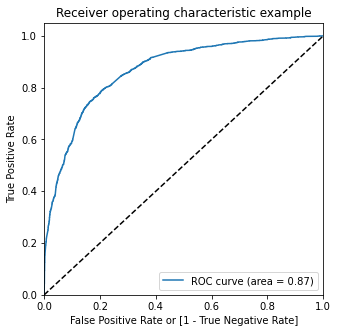

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

- Observation : Area in the ROC curve is 0.87

## Finding Optimal Cutoff Point

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.226703,5001,0,1,1,1,0,0,0,0,0,0,0
1,0,0.120036,1114,0,1,1,0,0,0,0,0,0,0,0
2,1,0.945298,3028,1,1,1,1,1,1,1,1,1,1,1
3,0,0.083665,5546,0,1,0,0,0,0,0,0,0,0,0
4,1,0.983446,8044,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.444912  1.000000  0.000000
0.1   0.1  0.568997  0.981900  0.238048
0.2   0.2  0.704429  0.940354  0.515331
0.3   0.3  0.765373  0.872480  0.679525
0.4   0.4  0.790630  0.791032  0.790307
0.5   0.5  0.795205  0.721102  0.854599
0.6   0.6  0.779832  0.647470  0.885922
0.7   0.7  0.745242  0.516660  0.928454
0.8   0.8  0.717789  0.419169  0.957138
0.9   0.9  0.669473  0.278486  0.982855


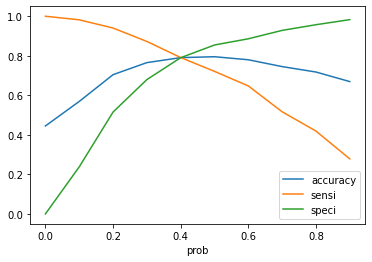

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Observation : As per the above plot, the convergence point is the ideal cut off, which is o.4

In [103]:
# using the 0.4 cut off, creating the new column final_predicted
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.226703,5001,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.120036,1114,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.945298,3028,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.083665,5546,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.983446,8044,1,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7906295754026355

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2397,  636],
       [ 508, 1923]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7910324969148499

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.7903066271018794

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20969337289812068


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7514654161781946


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8251290877796902


## Presicion & Recall

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 5459    0
 5460    1
 5461    1
 5462    0
 5463    0
 Name: Converted, Length: 5464, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 5459    0
 5460    1
 5461    1
 5462    1
 5463    0
 Name: predicted, Length: 5464, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

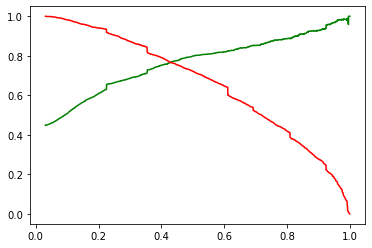

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Observation : Precision Recall Curve suggests that optimal cut off is 0.4

## Making predictions on the test set

In [116]:
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[var]=scaler.transform(X_test[var])

In [117]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Welingak Website,occupation_Student,occupation_Unemployed,occupation_Working Professional,Activity_Modified,Activity_Olark Chat Conversation,Activity_SMS Sent
5354,0.294118,0.173078,0,0,0,0,0,1,0,0,0,0
5162,0.411765,0.558176,0,0,0,0,0,1,0,0,0,1
9226,0.000000,0.000000,0,0,1,0,0,1,0,1,0,0
6271,0.000000,0.000000,0,0,1,0,1,0,0,1,0,0
5386,0.470588,0.214184,0,1,0,0,0,1,0,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_pred_final = pd.DataFrame({'Converted':y_test.values.reshape(-1), 'Conv_Prob':y_test_pred})
y_pred_final['CustID'] = y_test.index
y_pred_final.head()

,Converted,Conv_Prob,CustID
5354,1,0.197138,5354
5162,0,0.756878,5162
9226,0,0.225194,9226
6271,0,0.210698,6271
5386,1,0.339670,5386


In [121]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8100725565514298

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1123,  242],
       [ 203,  775]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7924335378323109

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8227106227106227

In [127]:
TP / float(TP+FP)

0.7620452310717798

In [128]:
# adding the lead number column using the index of y_test
y_pred_final['Lead Number']=y_pred_final.CustID.apply(lambda x : df.loc[x,:]['Lead Number'] ).astype('int')

In [129]:
y_pred_final['Lead Score'] = round(y_pred_final.Conv_Prob*100,2)

In [130]:
final_df=y_pred_final[['Lead Number','Lead Score']]

In [131]:
# final Leads with their Scores
final_df.head()

,Lead Number,Lead Score
5354,608784,19.71
5162,610375,75.69
9226,579735,22.52
6271,601727,21.07
5386,608539,33.97


- Conclusion: Using the Optimal Cut off - 0.4 

    - Specificity - 0.825 (over all 0's , 82.5% are predicted correct)
    - Sensitivity or Recall - 0.793 (over all 1's , 79.3% are predicted correct)
    - Percision - 0.76 (over all 1's predicted, 76% are predicted correct )
    - Accuracy - 0.81